In [16]:
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
# original_dataset_dir = './origional_train_data'
base_dir = './cats_and_dogs_small'
# os.mkdir(base_dir)

# Create test, train and validation dataset dir
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Cats and dogs training directory
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# Cats and dogs validation_cats_dir directory
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# Cats and dogs test directory
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [8]:
# Sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

In [11]:
# Rescale the pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# resize all images to 150x150 and set binary labels
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
checkpointer = ModelCheckpoint(filepath='saved_models/cats_and_dogs_small_1.h5', 
                               verbose=1, save_best_only=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      callbacks=[checkpointer], 
      verbose=1,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 8s - loss: 0.6486 - acc: 0.6110 - val_loss: 0.6420 - val_acc: 0.6200
Epoch 2/30
100/100 [==============================] - 8s - loss: 0.6059 - acc: 0.6780 - val_loss: 0.6412 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 8s - loss: 0.5620 - acc: 0.7015 - val_loss: 0.5892 - val_acc: 0.6870
Epoch 4/30
100/100 [==============================] - 8s - loss: 0.5319 - acc: 0.7295 - val_loss: 0.6286 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 8s - loss: 0.5125 - acc: 0.7435 - val_loss: 0.5613 - val_acc: 0.7110
Epoch 6/30
100/100 [==============================] - 8s - loss: 0.4772 - acc: 0.7755 - val_loss: 0.5755 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 8s - loss: 0.4524 - acc: 0.7875 - val_loss: 0.5666 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 8s - loss: 0.4375 - acc: 0.8025 - val_loss: 0.5722 - val_acc: 0.7040
Epoch 9/30
100/1

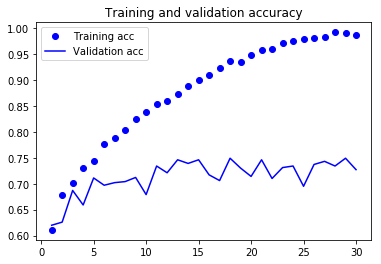

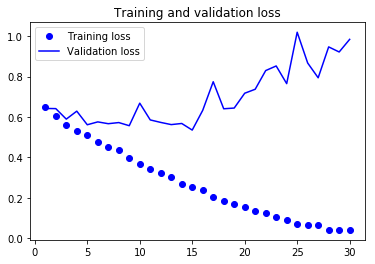

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

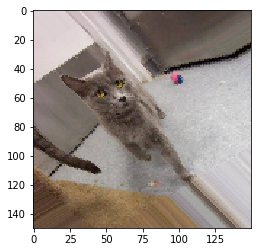

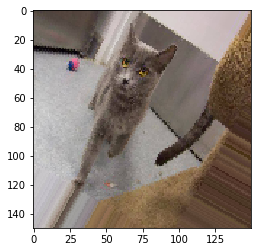

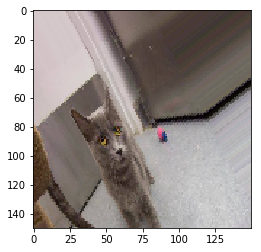

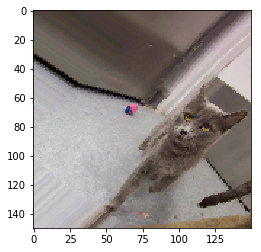

In [18]:
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[5]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [19]:
model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [25]:
model_aug.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

In [26]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen_aug = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator_aug = test_datagen_aug.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

checkpointer_aug = ModelCheckpoint(filepath='saved_models/cats_and_dogs_small_aug.h5', 
                            save_best_only=True)

history = model_aug.fit_generator(
      train_generator_aug,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator_aug,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s - loss: 0.6228 - acc: 0.6428 - val_loss: 0.5978 - val_acc: 0.6529oss: 0.6228 - acc: 0.642
Epoch 2/100
100/100 [==============================] - 22s - loss: 0.5953 - acc: 0.6762 - val_loss: 0.5811 - val_acc: 0.6830.676
Epoch 3/100
100/100 [==============================] - 22s - loss: 0.5864 - acc: 0.6822 - val_loss: 0.5753 - val_acc: 0.6802
Epoch 4/100
100/100 [==============================] - 22s - loss: 0.5842 - acc: 0.6950 - val_loss: 0.5993 - val_acc: 0.6856
Epoch 5/100
100/100 [==============================] - 22s - loss: 0.5672 - acc: 0.7003 - val_loss: 0.5674 - val_acc: 0.6821
Epoch 6/100
100/100 [==============================] - 22s - loss: 0.5675 - acc: 0.6872 - val_loss: 0.5361 - val_acc: 0.7300
Epoch 7/100
100/100 [==============================] - 22s - loss: 0.5484 - acc: 0.7172 - val_loss: 0.5763 - val_acc: 0.6811
Epoch 8/100
1

100/100 [==============================] - 22s - loss: 0.3655 - acc: 0.8400 - val_loss: 0.4291 - val_acc: 0.8052
Epoch 66/100
100/100 [==============================] - 23s - loss: 0.3592 - acc: 0.8353 - val_loss: 0.3988 - val_acc: 0.8241
Epoch 67/100
100/100 [==============================] - 22s - loss: 0.3548 - acc: 0.8378 - val_loss: 0.4387 - val_acc: 0.8160
Epoch 68/100
100/100 [==============================] - 22s - loss: 0.3436 - acc: 0.8425 - val_loss: 0.3957 - val_acc: 0.8325
Epoch 69/100
100/100 [==============================] - 22s - loss: 0.3466 - acc: 0.8453 - val_loss: 0.4591 - val_acc: 0.8015
Epoch 70/100
100/100 [==============================] - 23s - loss: 0.3487 - acc: 0.8409 - val_loss: 0.4135 - val_acc: 0.8192
Epoch 71/100
100/100 [==============================] - 23s - loss: 0.3469 - acc: 0.8462 - val_loss: 0.3887 - val_acc: 0.8351
Epoch 72/100
100/100 [==============================] - 22s - loss: 0.3483 - acc: 0.8478 - val_loss: 0.3983 - val_acc: 0.8185
Epoch

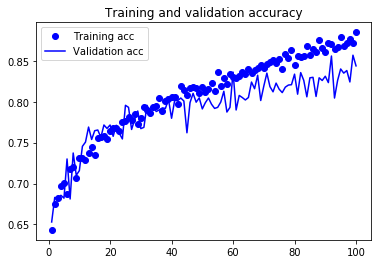

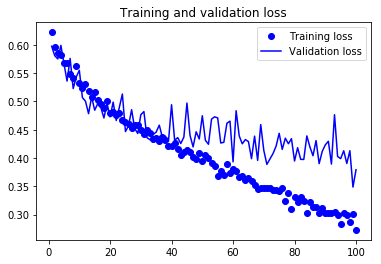

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()